In [1]:
%load_ext autoreload
%autoreload 2

In [66]:
from matplotlib import pyplot as plt
from regularization_helper import plot_it, get_simple_dataset, get_polynimial_set, plot_classifier, save_dataset
from sklearn import model_selection
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers
from fnn_helper import PlotLosses

(1000, 2)


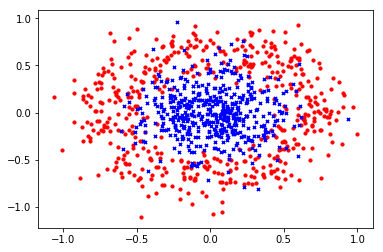

In [69]:
X,y = get_simple_dataset(N_total=1000, r_class_1=0.5, inner_radius=1.5)
plot_it(X,y)
plt.show()

In [11]:
degree=1
X = get_polynimial_set(X, degree)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.4, shuffle=True, random_state=500)
y_train = np.array(y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(120, 2)
(80, 2)
(120,)


In [42]:
X.shape

(200, 2)

In [70]:
save_dataset('1000_samples', X, y)

In [62]:
def get_basic_model(input_shape, output_size, lr=0.1):
    model = Sequential()
    sgd = optimizers.SGD(lr=lr)
    model.add(Dense(output_size, input_dim=input_shape,
                    activation='sigmoid', 
                    kernel_initializer='normal', 
                    name='Salida'
                   ))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model


basic_model = get_basic_model(X_train.shape[1], 1)
basic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Salida (Dense)               (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


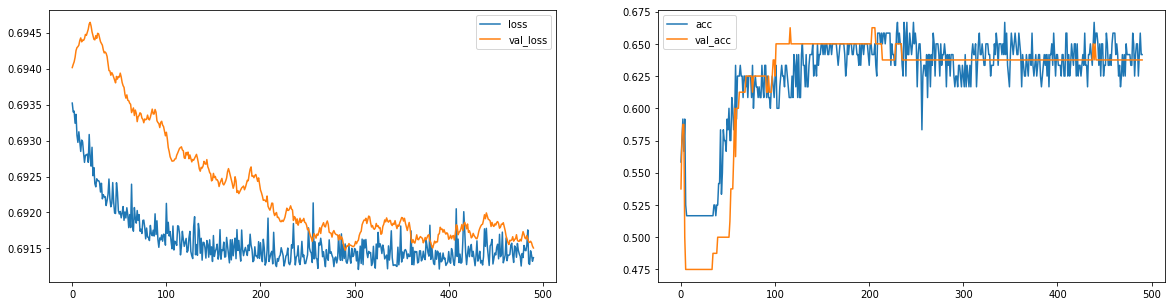

In [64]:
plot_losses = PlotLosses(plot_interval=10, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
basic_model = get_basic_model(X_train.shape[1], 1, lr=0.05)
basic_model.fit(X_train, 
          y_train, batch_size = 25,
          epochs=500, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

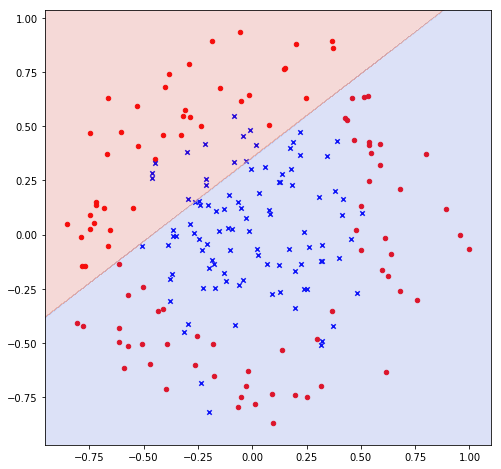

In [65]:
plot_classifier(X, y, basic_model.predict, degree, N = 500)
plt.show()

In [50]:
def two_layer_model(input_shape, output_size, lr=0.1):
    model = Sequential()
    sgd = optimizers.SGD(lr=lr)
    model.add(Dense(10,input_dim=input_shape,  activation='sigmoid', ))
    model.add(Dense(output_size, 
                    activation='sigmoid', 
                    kernel_initializer='zeros', 
                    name='Salida'
                   ))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

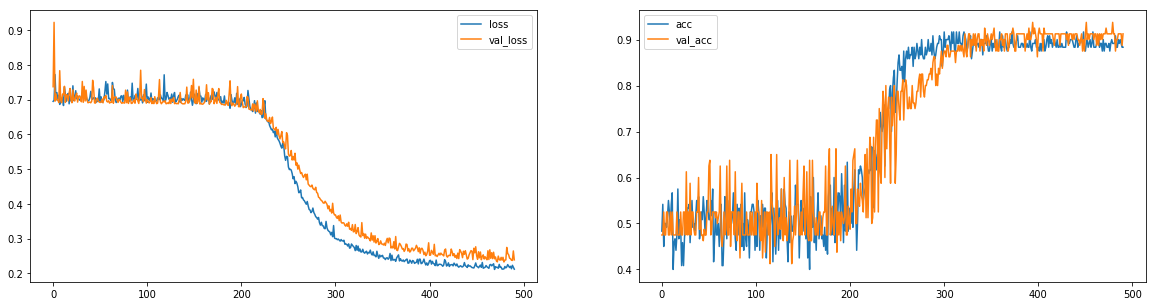

In [51]:
plot_losses = PlotLosses(plot_interval=10, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = two_layer_model(X_train.shape[1], 1, lr=1)
two_layer_model.fit(X_train, 
          y_train, batch_size = 25,
          epochs=500, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

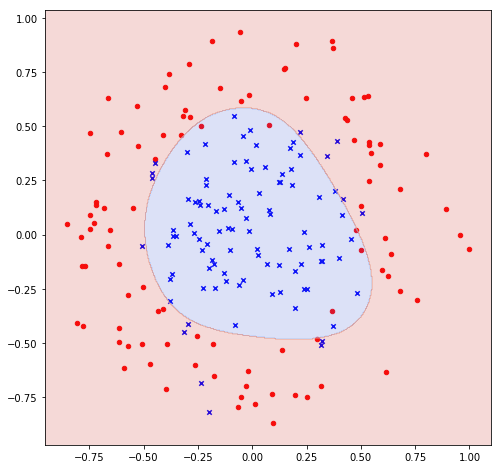

In [53]:
plot_classifier(X, y, two_layer_model.predict, degree, N = 500)
plt.show()

In [ ]:
data = np.loadtxt('ex2data2.txt', delimiter = ',', skiprows=0)
X = data[:,:2]
y = data[:,2]

In [ ]:
print()
degree=20
X = get_polynimial_set(X, degree)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.4, shuffle=True, random_state=500)
y_train = np.array(y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

In [ ]:
from keras import regularizers

In [ ]:
def basic_model(input_shape, output_size, lr=0.1):
    model = Sequential()
    sgd = optimizers.SGD(lr=lr)
    model.add(Dense(10,input_dim=input_shape))
    #model.add(Dropout(0.1))
    regularizer = regularizers.l2(0.01)
    model.add(Dense(output_size, 
                    activation='sigmoid', 
                    kernel_initializer='zeros', 
                    name='Salida', 
                    kernel_regularizer=regularizer, 
                    bias_regularizer=regularizer
                   ))
    #model.add(Dense(output_size, activation='sigmoid', kernel_initializer='zeros', name='Salida', input_dim=input_shape))
    #model.add(Dropout(0.1))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
model = basic_model(X_train.shape[1], 1)
model.summary()

In [ ]:
plot_losses = PlotLosses(plot_interval=10, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
model = basic_model(X_train.shape[1], 1, lr=0.5)
model.fit(X_train, 
          y_train, batch_size = 25,
          epochs=500, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

In [ ]:
model.get_weights()

In [ ]:
plot_classifier(X, y, model.predict, degree, N = 500)
plt.show()

In [ ]:
from keras.datasets import mnist
import keras
(_, _), (x, y) = mnist.load_data()
x = x[:500]
y = y[:500]

In [ ]:
# 20% del dataset para validación
validation = 0.50
N_validation_split = int(x.shape[0]*(1-validation))
# Training Set
x_train = x[:N_validation_split]
y_train = y[:N_validation_split]

# Cross Validation Set
x_val = x[N_validation_split:]
y_val = y[N_validation_split:]

In [ ]:
y_train_categorical = keras.utils.to_categorical(y_train)
y_val_categorical = keras.utils.to_categorical(y_val)

In [ ]:
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import np_utils
from fnn_helper import PlotLosses

In [ ]:
def two_layer_model(lr=0.000001, decay=0):
    output_size = 10
    model = Sequential()
    model.add(Flatten(input_shape=x_train.shape[1:]))
    model.add(Dense(int(784), activation='sigmoid', kernel_initializer='normal', name='middle1'))
    #model.add(Dense(int(784/2), activation='sigmoid', kernel_initializer='normal', name='middle2'))
    model.add(Dense(output_size, activation='softmax', kernel_initializer='normal', name='Salida'))
    
    SGD = optimizers.SGD(lr=lr)
    model.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])
    return model
model_two_layers = two_layer_model()
model_two_layers.summary()

In [ ]:
plot_losses = PlotLosses(plot_interval=5, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)
model_two_layers = two_layer_model(lr=0.05) # lr=0.000001, 
model_two_layers.fit(x_train, 
          y_train_categorical ,
          epochs=500, batch_size=100, 
          #verbose=1, 
          validation_data=(x_val, y_val_categorical), 
          callbacks=[plot_losses],
         )

# Hyperparametros, parameter tunning

# K-fold Cross Validation

In [75]:
from sklearn.model_selection import StratifiedKFold

In [76]:
skf = StratifiedKFold(10)

In [82]:
i=0
for train_index, test_index in skf.split(X_train, y_train):
    i=i+1
    print("CV dataset:", i)
    print(train_index.shape, test_index.shape)

CV dataset: 1
(107,) (13,)
CV dataset: 2
(107,) (13,)
CV dataset: 3
(108,) (12,)
CV dataset: 4
(108,) (12,)
CV dataset: 5
(108,) (12,)
CV dataset: 6
(108,) (12,)
CV dataset: 7
(108,) (12,)
CV dataset: 8
(108,) (12,)
CV dataset: 9
(109,) (11,)
CV dataset: 10
(109,) (11,)


In [ ]:

plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)
skf.get_n_splits(x_train, y_train)
accuracies = []
for train_index, test_index in skf.split(x_train, y_train):
    model_two_layers = two_layer_model(lr=0.05) # lr=0.000001, 
    model_two_layers.fit(x_train[train_index], 
              y_train_categorical[train_index],
              epochs=200, batch_size=100, 
              verbose=0, 
              validation_data=(x_train[test_index], y_train_categorical[test_index]), 
              callbacks=[plot_losses],
             )
    score = model_two_layers.evaluate(x_val, y_val_categorical, verbose=0)
    accuracies.append(score[1])
    print("loss: ", score[0], "- accuracy: ", score[1])

In [ ]:
score = model_two_layers.evaluate(x_val, y_val_categorical, verbose=0)
print("loss: ", score[0], "- accuracy: ", score[1])

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
def build_classifier():
    lr=0.05
    output_size = 10
    model = Sequential()
    model.add(Flatten(input_shape=x_train.shape[1:]))
    model.add(Dense(int(784), activation='sigmoid', kernel_initializer='normal', name='middle1'))
    #model.add(Dense(int(784/2), activation='sigmoid', kernel_initializer='normal', name='middle2'))
    model.add(Dense(output_size, activation='softmax', kernel_initializer='normal', name='Salida'))
    
    SGD = optimizers.SGD(lr=lr)
    model.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(build_classifier, batch_size=100,  epochs=200, verbose=0)

In [ ]:
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train_categorical, cv=10, n_jobs=-1)

In [ ]:
accuracies

# Modeling selection

# Alta varianza en k-fold indicaria overfitting